In [1]:
import requests
import re
import numpy as np
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')
r.text

'{"s":"北京市地铁","i":"1100","l":[{"st":[{"rs":"270 684|270 684","udpx":"270 687;270 681","su":"1","udsu":"1;1","n":"金安桥","sid":"110100023339035","p":"270 684","r":"900000069871|110100023339","udsi":"900000069872015;900000069871002","t":"1","si":"110100023339035","sl":"116.163167,39.923620","udli":"900000069872;900000069871","poiid":"BV10813545","lg":"0","sp":"jin an qiao"},{"rs":"226 684","udpx":"226 681;226 687","su":"1","udsu":"1;1","n":"四道桥","sid":"900000069871003","p":"226 684","r":"900000069871","udsi":"900000069871003;900000069872014","t":"0","si":"900000069871003","sl":"116.134010,39.916030","udli":"900000069871;900000069872","poiid":"BV10813547","lg":"0","sp":"si dao qiao"},{"rs":"181 684","udpx":"180 681;180 687","su":"1","udsu":"1;1","n":"桥户营","sid":"900000069871004","p":"181 684","r":"900000069871","udsi":"900000069871004;900000069872013","t":"0","si":"900000069871004","sl":"116.125809,39.912383","udli":"900000069871;900000069872","poiid":"BV10813541","lg":"0","sp":"qiao hu yin

In [83]:
from collections import defaultdict
import json
def get_lines_stations_info(text):
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_list = json.loads(text)
    lines_info = defaultdict(list)
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = defaultdict(tuple)
    is_lo = defaultdict(int)
    for info in lines_list['l']:
        key = info['ln']
        is_lo[key] = int(info['lo'])
        for line in info['st']:
            lines_info[key].append(line['n'])
            station = tuple([float(co) for co in line['sl'].split(',')])
            stations_info[line['n']]=station
    
    for i in range(len(lines_info)):
        # 你可能需要思考的几个问题，获取「地铁线路名称，站点信息list，站名，坐标(x,y)，数据加入站点的信息dict，将数据加入地铁线路dict」
        pass
    return lines_info,stations_info,is_lo

lines_info, stations_info, is_lo = get_lines_stations_info(r.text)
print(stations_info)

defaultdict(<class 'tuple'>, {'金安桥': (116.163167, 39.92362), '四道桥': (116.13401, 39.91603), '桥户营': (116.125809, 39.912383), '上岸': (116.122225, 39.905138), '栗园庄': (116.123254, 39.89578), '小园': (116.114443, 39.890465), '石厂': (116.100334, 39.889378), '苹果园': (116.177388, 39.926727), '古城': (116.190337, 39.90745), '八角游乐园': (116.212684, 39.907442), '八宝山': (116.235948, 39.90744), '玉泉路': (116.252888, 39.907433), '五棵松': (116.273987, 39.907456), '万寿路': (116.294765, 39.907474), '公主坟': (116.309919, 39.907469), '军事博物馆': (116.321459, 39.907422), '木樨地': (116.337583, 39.907379), '南礼士路': (116.352583, 39.907234), '复兴门': (116.356866, 39.907242), '西单': (116.374072, 39.907383), '天安门西': (116.391278, 39.907472), '天安门东': (116.401216, 39.90778), '王府井': (116.411571, 39.908069), '东单': (116.41848, 39.908325), '建国门': (116.435806, 39.908501), '永安里': (116.450497, 39.908454), '国贸': (116.461841, 39.909104), '大望路': (116.475783, 39.908287), '四惠': (116.495456, 39.908749), '四惠东': (116.515664, 39.908495), '积水潭': (116.373126,

In [84]:
# 根据线路信息，建立站点邻接表dict
def get_neighbor_info(lines_info):
    neighbor_info = defaultdict(list)
        # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(info, str1, str2):
        # 请在这里写代码
        if str2 not in info[str1]:
            info[str1].append(str2)
    for info in lines_info:
        name_list = lines_info[info]
        if is_lo[info] == 1:
            add_neighbor_dict(neighbor_info, name_list[0],name_list[-1])
            add_neighbor_dict(neighbor_info, name_list[-1],name_list[0])
                
        for idx,station in enumerate(name_list[1:]):
            add_neighbor_dict(neighbor_info,name_list[idx],name_list[idx+1])
            add_neighbor_dict(neighbor_info,name_list[idx+1],name_list[idx])

        
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
print(neighbor_info)


defaultdict(<class 'list'>, {'金安桥': ['四道桥', '杨庄'], '四道桥': ['金安桥', '桥户营'], '桥户营': ['四道桥', '上岸'], '上岸': ['桥户营', '栗园庄'], '栗园庄': ['上岸', '小园'], '小园': ['栗园庄', '石厂'], '石厂': ['小园'], '苹果园': ['古城'], '古城': ['苹果园', '八角游乐园'], '八角游乐园': ['古城', '八宝山'], '八宝山': ['八角游乐园', '玉泉路'], '玉泉路': ['八宝山', '五棵松'], '五棵松': ['玉泉路', '万寿路'], '万寿路': ['五棵松', '公主坟'], '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'], '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'], '木樨地': ['军事博物馆', '南礼士路'], '南礼士路': ['木樨地', '复兴门'], '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'], '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'], '天安门西': ['西单', '天安门东'], '天安门东': ['天安门西', '王府井'], '王府井': ['天安门东', '东单'], '东单': ['王府井', '建国门', '崇文门', '灯市口'], '建国门': ['东单', '永安里', '朝阳门', '北京站'], '永安里': ['建国门', '国贸'], '国贸': ['永安里', '大望路', '金台夕照', '双井'], '大望路': ['国贸', '四惠', '金台路', '九龙山'], '四惠': ['大望路', '四惠东'], '四惠东': ['四惠', '高碑店'], '积水潭': ['西直门', '鼓楼大街'], '西直门': ['积水潭', '车公庄', '新街口', '动物园', '大钟寺'], '鼓楼大街': ['积水潭', '安定门', '什刹海', '安德里北街'], '安定门': ['鼓楼大街', '雍和宫'], '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'], '东直门': ['雍和宫

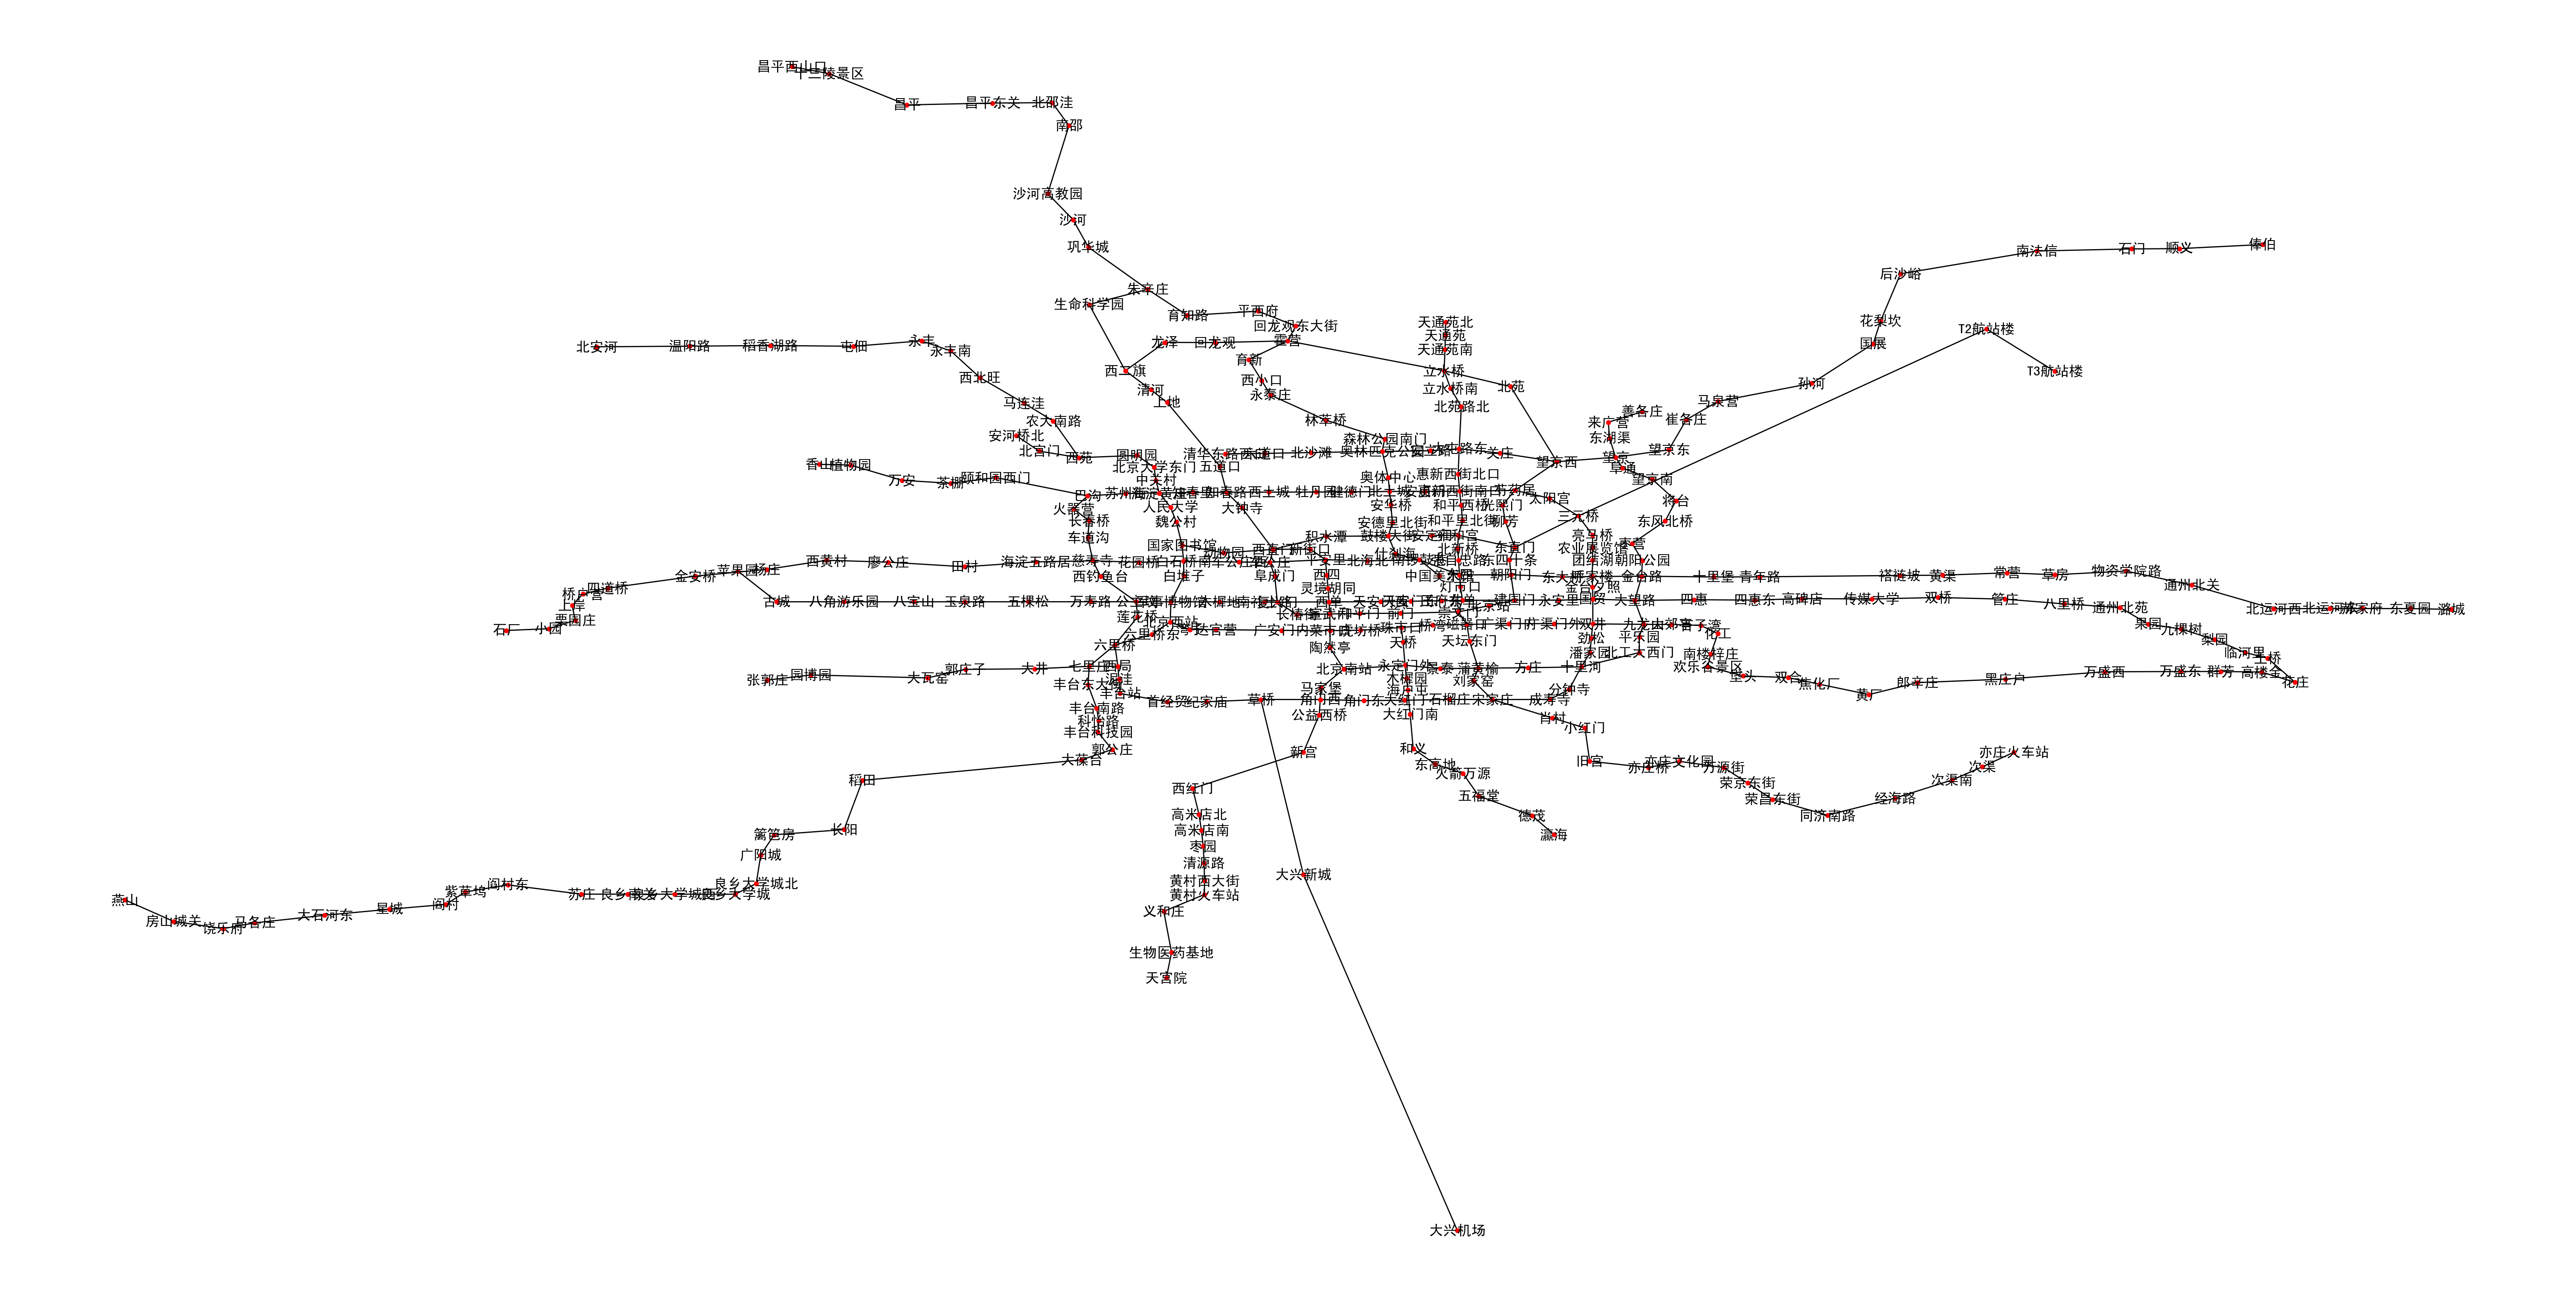

In [98]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
neighbor_graph = nx.Graph(neighbor_info)
plt.figure(figsize=(30,15), dpi= 200)
nx.draw(neighbor_graph,stations_info,with_labels=True,node_size=10,font_size=12,node_color='r')

In [176]:
found = False
prev = []
# 你可以用递归查找所有路径
def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    # 递归算法，本质上是深度优先
    # 遍历所有路径
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 检查输入站点名称
    path = []
    path = get_next_station_DFS_ALL(from_station, neighbor_info, to_station,path)

def get_next_station_DFS_ALL(node, neighbor_info, to_station, path=None):
    global found
    global prev
    if path is None:
        path = [node]
    if found == True:
        return path
    if node is None:
        return path
    if node == to_station:
        print(path)
        found = True
        return path
    prev.append(node)
    neighbor_list = neighbor_info[node]

    for neighbor in neighbor_list:
        if found == True:
            return
        if neighbor in prev:
            continue
        get_next_station_DFS_ALL(neighbor, neighbor_info, to_station, path+[neighbor])

get_path_DFS_ALL(lines_info,  neighbor_info, '俸伯', '立水桥')

['顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '阜通', '望京南', '将台', '东风北桥', '枣营', '朝阳公园', '金台路', '呼家楼', '东大桥', '朝阳门', '东四十条', '东直门', '雍和宫', '安定门', '鼓楼大街', '积水潭', '西直门', '车公庄', '阜成门', '复兴门', '南礼士路', '木樨地', '军事博物馆', '公主坟', '西钓鱼台', '慈寿寺', '花园桥', '白石桥南', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '知春里', '知春路', '西土城', '牡丹园', '健德门', '北土城', '奥体中心', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '立水桥']
None


In [173]:
def get_path_DFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    # 检查输入站点名称
    flag = False
    if from_station not in neighbor_info:
        return False
    queue = [(from_station, [from_station])]
    seen = set() # 
    seen.add(from_station)
    while len(queue)>0:
        if flag:
            break
        (node, path)= queue.pop()
        nodes=neighbor_info[node] # 子节点的数组
        for next_node in nodes:
            if next_node in seen:
                continue
            if next_node == to_station:
                path + [next_node]
                flag = True
                return path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))
                
pathes = get_path_DFS(lines_info, neighbor_info, '立水桥', '顺义')
print(pathes)

['立水桥', '北苑', '望京西', '望京', '望京东', '崔各庄', '马泉营', '孙河', '国展', '花梨坎', '后沙峪', '南法信', '石门', '顺义']


In [ ]:
def get_path_BFS(lines_info, neighbor_info, from_station, to_station):
    # 搜索策略：以站点数量为cost（因为车票价格是按站算的）
    # 这种情况下，站点间的坐标距离难以转化为可靠的启发函数，所以只用简单的BFS算法
    # 由于每深一层就是cost加1，所以每层的cost都相同，算和不算没区别，所以省略
    # 检查输入站点名称
    flag = False
    if from_station not in neighbor_info:
        return False
    queue = [(from_station, [from_station])]
    seen = set() # 
    seen.add(from_station)
    while len(queue)>0:
        if flag:
            break
        (node, path)= queue.pop(0)
        nodes=neighbor_info[node] # 子节点的数组
        for next_node in nodes:
            if next_node in seen:
                continue
            if next_node == to_station:
                path + [next_node]
                flag = True
                return path + [next_node]
            else:
                queue.append((next_node, path + [next_node]))
                
pathes = get_path_BFS(lines_info, neighbor_info, '立水桥', '顺义')
print(pathes)